# What is SVM? 
- SVM finds a decision boundary that maximizes the margin between classes. 
- The model predicts this using: 
    - y=sign(w⋅x+b)
- The loss function is Hinge loss: 
    - L=max(0,1−yi​(w⋅xi​+b))
- For multiple samples: 
    - Loss=(1/N)*​i∑​max(0,1−yi​(w⋅xi​+b))+λ∣∣w∣∣2

In [18]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import sklearn.datasets as ds 
import sklearn.model_selection as mod_sel 
import sklearn.preprocessing as pre_process 
import matplotlib.pyplot as plt 

In [19]:
X, y = ds.make_blobs(
    n_samples=500,
    n_features=2,
    centers=2,            # two distinct clusters (binary classification)
    cluster_std=1.0,      # smaller = more separable (try 0.5 for perfect split)
    random_state=42
)

y = 2 * y - 1

X_train, X_test, y_train, y_test = mod_sel.train_test_split(X, y, test_size=0.2, random_state=42)

scaler = pre_process.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train) 
y_test = torch.FloatTensor(y_test) 


In [20]:
class SVM(nn.Module):
    def __init__(self, input_dim):
        super(SVM, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        return self.linear(x)

def hinge_loss(outputs, labels):
    # labels are -1 or 1
    return torch.mean(torch.clamp(1 - labels.view(-1, 1) * outputs, min=0))


In [23]:
model = SVM(input_dim=2)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)  
n_epochs = 1000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = hinge_loss(outputs, y_train) + 0.5 * torch.norm(model.linear.weight) ** 2  
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.3701
Epoch [200/1000], Loss: 0.3484
Epoch [300/1000], Loss: 0.3471
Epoch [400/1000], Loss: 0.3470
Epoch [500/1000], Loss: 0.3470
Epoch [600/1000], Loss: 0.3470
Epoch [700/1000], Loss: 0.3470
Epoch [800/1000], Loss: 0.3470
Epoch [900/1000], Loss: 0.3470
Epoch [1000/1000], Loss: 0.3470


Test Accuracy: 100.00%


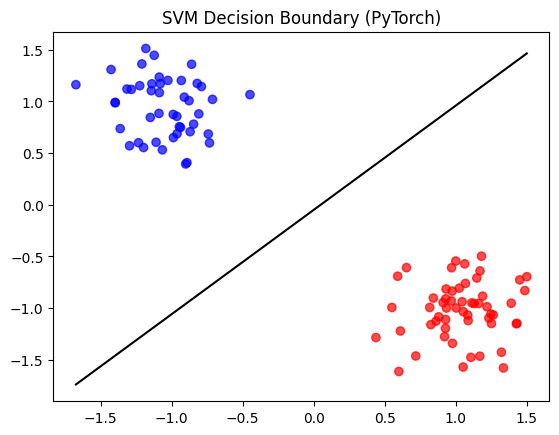

In [24]:
with torch.no_grad():
    preds = torch.sign(model(X_test))
    acc = torch.mean((preds.view(-1) == y_test).float())
    print(f"Test Accuracy: {acc.item()*100:.2f}%")

# Visualize decision boundary
w = model.linear.weight.detach().numpy()[0]
b = model.linear.bias.detach().numpy()[0]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.7)
x_vals = torch.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k-')
plt.title('SVM Decision Boundary (PyTorch)')
plt.show()
